In [1]:
import torch
from torch import nn
import torchvision
from torchvision.transforms import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os

In [2]:
print(torch.__version__)
print(torchvision.__version__)

1.12.1
0.13.1


In [3]:
train_dir = "chest_xray/train/"
test_dir = "chest_xray/test/"

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [6]:
train_data = torchvision.datasets.ImageFolder(root=train_dir, transform=transform)
test_data = torchvision.datasets.ImageFolder(root=test_dir, transform=transform)

In [7]:
len(train_data), len(test_data)

(5216, 624)

In [8]:
image, label = train_data[0]

In [9]:
image, label

(tensor([[[0.0863, 0.0784, 0.0745,  ..., 0.3725, 0.3725, 0.3725],
          [0.0863, 0.0824, 0.0745,  ..., 0.3647, 0.3725, 0.3725],
          [0.0902, 0.0824, 0.0745,  ..., 0.3647, 0.3686, 0.3647],
          ...,
          [0.1176, 0.1137, 0.1098,  ..., 0.2353, 0.2353, 0.2353],
          [0.1373, 0.1373, 0.1333,  ..., 0.3176, 0.3216, 0.3216],
          [0.1765, 0.1765, 0.1765,  ..., 0.4196, 0.4235, 0.4235]],
 
         [[0.0863, 0.0784, 0.0745,  ..., 0.3725, 0.3725, 0.3725],
          [0.0863, 0.0824, 0.0745,  ..., 0.3647, 0.3725, 0.3725],
          [0.0902, 0.0824, 0.0745,  ..., 0.3647, 0.3686, 0.3647],
          ...,
          [0.1176, 0.1137, 0.1098,  ..., 0.2353, 0.2353, 0.2353],
          [0.1373, 0.1373, 0.1333,  ..., 0.3176, 0.3216, 0.3216],
          [0.1765, 0.1765, 0.1765,  ..., 0.4196, 0.4235, 0.4235]],
 
         [[0.0863, 0.0784, 0.0745,  ..., 0.3725, 0.3725, 0.3725],
          [0.0863, 0.0824, 0.0745,  ..., 0.3647, 0.3725, 0.3725],
          [0.0902, 0.0824, 0.0745,  ...,

Image shape: torch.Size([3, 224, 224])


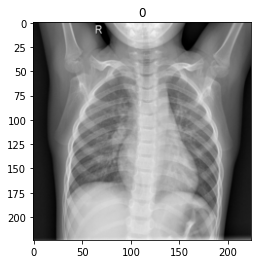

In [10]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.permute(1,2,0)) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

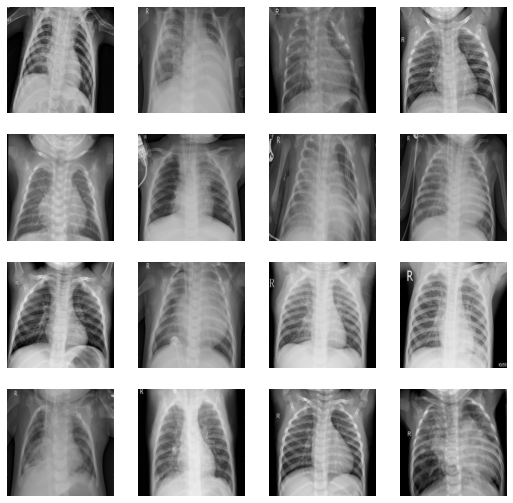

In [11]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.permute(1,2,0))
    plt.axis(False);

In [12]:
train_load = torch.utils.data.DataLoader(train_data, batch_size = 32, shuffle = True)
test_load = torch.utils.data.DataLoader(test_data, batch_size =32, shuffle = False)

In [13]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_load))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

### Model.0 Baseline Model

In [14]:
# ## Example of what Flatten does
# flatten_model = nn.Flatten()

# x = train_features_batch

# output = flatten_model(x)

In [15]:
# print(x.shape) ## -> [color_channels, height, width]
# print(output.shape) ## -> [color_channels, height * weight]

In [16]:
# class x_ray_v0(nn.Module):
#     def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
#         super().__init__()
#         self.layer_stack = nn.Sequential(
#         nn.Flatten(),
#         nn.Linear(in_features = input_shape,
#                  out_features = hidden_units),
#         nn.Linear(in_features = hidden_units,
#                  out_features = output_shape))
        
#     def forward(self, x):
#         return self.layer_stack(x)

In [17]:
# torch.manual_seed(42)

# model_v0 = x_ray_v0(input_shape=3*224*224,
#                    hidden_units=10,
#                    output_shape=2).to(device)

In [18]:
# model_v0

In [19]:
# dummy_x = torch.rand([32,3,224,224]).to(device)
# model_v0(dummy_x)

In [20]:
# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(params = model_v0.parameters(),lr=0.1)

In [21]:
# from tqdm.auto import tqdm

# torch.manual_seed(42)

# epochs = 3

# for epoch in tqdm(range(epochs)):
#     print(f"Epoch: {epoch}\n-------")
    
#     train_loss = 0
    
#     for batch, (X,y) in enumerate(train_load):
#         model_v0.train()
        
#         y_pred= model_v0(X.to(device))
        
#         loss = loss_fn(y_pred, y.to(device))
#         train_loss += loss
        
#         optimizer.zero_grad()
        
#         loss.backward()
        
#         optimizer.step()
        
#         if batch % 400 == 0:
#             print(f"Looked at {batch * len(X)}/{len(train_load.dataset)} samples")
            
#         train_loss /= len(train_load)
        
#         test_loss, test_acc = 0, 0 
#         model_v0.eval()
#         with torch.inference_mode():
#             for X, y in test_load:
#             # 1. Forward pass
#                 test_pred = model_v0(X.to(device))
           
#             # 2. Calculate loss (accumatively)
#                 test_loss += loss_fn(test_pred, y.to(device)) # accumulatively add up the loss per epoch

        
#         # Calculations on test metrics need to happen inside torch.inference_mode()
#         # Divide total test loss by length of test dataloader (per batch)
#             test_loss /= len(test_load)


#     ## Print out what's happening
#         print(f"\nTrain loss: {train_loss:.5f}\n")


In [22]:
class x_ray_v2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                 out_channels=hidden_units,
                 kernel_size = 3,
                 stride = 1,
                 padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size = 3,
                 stride = 1,
                 padding =1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                    stride = 2))
            
        self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2))
        
        self.block_3 = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 31360,
                 out_features = 10),
        nn.Linear(in_features = 10,
                 out_features = output_shape))
            
    def forward(self, x: torch.Tensor):
            x = self.block_1(x)
            
            x = self.block_2(x)
            
            x= self.block_3(x)
            
            return x
            

In [23]:
torch.manual_seed(42)

model_v2 = x_ray_v2(input_shape = 3,
                   hidden_units = 10,
                   output_shape = 2).to(device)

In [24]:
model_v2

x_ray_v2(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_3): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=31360, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=2, bias=True)
  )
)

In [25]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [26]:
from helper_functions import accuracy_fn

In [27]:
from tqdm.auto import tqdm
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [28]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_v2.parameters(), 
                             lr=0.001)

In [29]:
torch.manual_seed(42)
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_load, 
        model=model_v2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_load,
        model=model_v2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.39925 | Train accuracy: 81.84%
Test loss: 0.70215 | Test accuracy: 74.53%

Epoch: 1
---------
Train loss: 0.16388 | Train accuracy: 93.69%
Test loss: 0.97010 | Test accuracy: 71.72%

Epoch: 2
---------
Train loss: 0.13467 | Train accuracy: 95.05%
Test loss: 0.75508 | Test accuracy: 74.69%

Epoch: 3
---------
Train loss: 0.12047 | Train accuracy: 95.46%
Test loss: 0.75175 | Test accuracy: 75.00%

Epoch: 4
---------
Train loss: 0.11373 | Train accuracy: 95.65%
Test loss: 0.87297 | Test accuracy: 74.69%

